In [2]:
!pip install pytorch-tabnet --quiet
!pip install wget --quiet
!pip install openTSNE
from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import wget
from google.colab import drive
drive.mount('/content/drive')
from typing import Optional, Union, Tuple
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.metrics import accuracy_score
import pandas as pd
def get_labels(x: pd.Series) -> pd.Series:
    labels, _ = pd.factorize(x)
    return pd.Series(labels, name=x.name, index=x.index)
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from pytorch_tabnet.augmentations import RegressionSMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
def my_mse_loss_fn(y_pred, y_true):
    """
    Dummy example similar to using default torch.nn.functional.mse_loss
    """
    mse_loss = (y_true - y_pred) ** 2
    return torch.mean(mse_loss)
def my_rmse_loss_fn(y_pred, y_true):
    """
    Función de pérdida que calcula el RMSE entre la predicción y el valor verdadero.
    """
    mse_loss = (y_true - y_pred) ** 2
    mean_mse_loss = torch.mean(mse_loss)
    rmse_loss = torch.sqrt(mean_mse_loss)
    return rmse_loss
def my_mae_loss_fn(y_pred, y_true):
    """
    Calcula el error absoluto medio (Mean Absolute Error, MAE) entre las predicciones y los valores reales.
    Similar al uso de torch.nn.functional.l1_loss.
    """
    mae_loss = torch.abs(y_true - y_pred)
    return torch.mean(mae_loss)

def my_mape_loss_fn(y_pred, y_true):
    """
    Calcula el error porcentual absoluto medio (Mean Absolute Percentage Error, MAPE)
    entre las predicciones y los valores reales.
    """
    mape_loss = torch.abs((y_true - y_pred) / y_true) * 100
    return torch.mean(mape_loss)
def my_r2_score_fn(y_pred, y_true):
    """
    Calcula el coeficiente de determinación R².
    """
    total_variance = torch.var(y_true, unbiased=False)  # Varianza total
    unexplained_variance = torch.mean((y_true - y_pred) ** 2)  # Varianza no explicada (MSE)
    r2_score = 1 - (unexplained_variance / total_variance)
    return 1-r2_score

Mounted at /content/drive


In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Cargar datos
Xdata = pd.read_csv('/content/drive/Shareddrives/CHEC/data_chec/datos/Data_Total/Clima/super_tabla_clima_v0.csv')
Xdata=Xdata[Xdata['duracion_h']<=100]
#Xdata=Xdata[Xdata['MUN']=='MANIZALES']
Dur_h= Xdata['duracion_h'].values
SAIDI=Xdata['SAIDI'].values
# Eliminar columnas que no se utilizarán
Xdata.drop(['inicio_evento','h0-solar_rad','h0-uv','h1-solar_rad','h1-uv','h2-solar_rad','h2-uv','h3-solar_rad','h3-uv',
'h4-solar_rad','h4-uv','h5-solar_rad','h5-uv','h19-solar_rad','h19-uv','h20-solar_rad','h20-uv',
'h21-solar_rad','h21-uv','h22-solar_rad','h22-uv','h23-solar_rad','h23-uv','evento', 'fin', 'inicio','cnt_usus','DEP', 'MUN', 'FECHA'], inplace=True, axis=1)#'duracion_h'


# Definir la variable target y eliminarla del conjunto de características
target = ['SAIFI','SAIDI','duracion_h']
y1 = Xdata[target].values#.reshape(-1, 1)
Xdata.drop(target, axis=1, inplace=True)
df = Xdata.copy()

# Identificar columnas numéricas y categóricas
NUMERIC_COLUMNS = df.select_dtypes(include=['number']).columns.tolist()
CATEGORICAL_COLUMNS = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Rellenar valores faltantes
# Para numéricos: valor muy alto (3 veces el máximo de cada columna)
# Para categóricos: "no aplica"
for col in NUMERIC_COLUMNS:
    max_value = df[col].max()
    df[col].fillna(-10 * max_value, inplace=True)

for col in CATEGORICAL_COLUMNS:
    df[col].fillna("no aplica", inplace=True)

# Codificar variables categóricas y obtener sus dimensiones
categorical_dims = {}
for col in CATEGORICAL_COLUMNS:
    l_enc = LabelEncoder()
    df[col] = l_enc.fit_transform(df[col].astype(str))
    categorical_dims[col] = len(l_enc.classes_)

# Crear lista de características
unused_feat = []
features = [col for col in df.columns if col not in unused_feat + [target]]

# Obtener índices y dimensiones de variables categóricas


# Preparar datos
X = df[features].values.astype('float32')
y = y1.astype('float32')
percentiles = np.percentile(y, [33.33, 66.66])  # Divisiones en tercios
y_categorized = np.digitize(y[:,0:1].flatten(), bins=percentiles).astype(int)

# Escalar la variable objetivo
scaler =  MinMaxScaler()
y_scaled = scaler.fit_transform(y)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42,stratify=y_categorized)
percentiles = np.percentile(y, [33.33, 66.66])  # Divisiones en tercios
y_categorized_t = np.digitize(y_train[:,0:1].flatten(), bins=percentiles).astype(int)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42,stratify=y_categorized_t)


<ipython-input-3-c86d202c69d5>:7: DtypeWarning: Columns (312,321,322) have mixed types. Specify dtype option on import or set low_memory=False.
  Xdata = pd.read_csv('/content/drive/Shareddrives/CHEC/data_chec/datos/Data_Total/Clima/super_tabla_clima_v0.csv')
<ipython-input-3-c86d202c69d5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xdata.drop(['inicio_evento','h0-solar_rad','h0-uv','h1-solar_rad','h1-uv','h2-solar_rad','h2-uv','h3-solar_rad','h3-uv',
<ipython-input-3-c86d202c69d5>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [4]:

df

,h0-clouds,h0-precip,h0-pres,h0-rh,h0-slp,h0-temp,h0-vis,h0-wind_gust_spd,h0-wind_spd,h1-clouds,...,NIVEL2CONDUCTOR,NIVEL3CONDUCTOR,NIVEL4CONDUCTOR,ACOMETIDACONDUCTOR,NEUTRO,CALIBRENEUTRO,CAPACITY,RESISTANCE,LONGITUD2,LATITUD2
0,51.0,0.00,803.0,82.0,1014.0,12.6,8.0,4.4,0.8,47.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
1,51.0,0.00,803.0,82.0,1014.0,12.6,8.0,4.4,0.8,47.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
2,51.0,0.00,803.0,82.0,1014.0,12.6,8.0,4.4,0.8,47.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
3,51.0,0.00,803.0,82.0,1014.0,12.6,8.0,4.4,0.8,47.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
4,51.0,0.00,803.0,82.0,1014.0,12.6,8.0,4.4,0.8,47.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168220,89.0,0.00,763.0,95.0,1018.0,13.3,7.0,4.8,0.8,89.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
168221,95.0,2.50,908.0,91.0,1014.0,17.0,10.0,2.4,0.4,96.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
168222,70.0,1.75,879.0,87.0,1015.0,18.5,10.0,2.4,0.8,66.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089
168223,76.0,0.25,907.0,89.0,1015.0,18.9,10.0,3.6,0.8,74.0,...,-10.0,-10.0,-10.0,-10.0,3,13,-4000.0,-21.907,746.622688,-57.754089


#Prueba Rayos

In [ ]:
# best_params =  {'n_d': 70, 'n_a': 36, 'n_steps': 9, 'gamma': 2.097629263742674e-12, 'lambda_sparse': 3.2234565182287885e-11,
#   'batch_size': 2048, 'mask_type': 'entmax', 'emb': 63, 'momentum': 0.31046236767645463,
#   'learning_rate': 0.048059925594866174, 'weight_decay': 2.5610371958076783e-05, 'scheduler_gamma': 0.5738715050667953,
#   'step_size': 4, 'virtual_batch_size': 1024, 'optimizer_type': 'adam', 'p': 0.14601541750114974}

# # Asignación de parámetros
# n_d = best_params['n_d']
# n_a = best_params['n_a']
# n_steps = best_params['n_steps']
# gamma = best_params['gamma']
# lambda_sparse = best_params['lambda_sparse']
# mask_type = best_params['mask_type']
# batch_size = best_params['batch_size']
# emb = best_params['emb']
# p = best_params['p']
# momentum = best_params['momentum']
# learning_rate = best_params['learning_rate']
# weight_decay = best_params['weight_decay']
# scheduler_gamma = best_params['scheduler_gamma']
# step_size = best_params['step_size']
# virtual_batch_size = best_params['virtual_batch_size']
# optimizer_type = best_params['optimizer_type']

# # Definición del optimizador
# if optimizer_type == 'adam':
#     optimizer_fn = torch.optim.Adam
# elif optimizer_type == 'sgd':
#     optimizer_fn = torch.optim.SGD
# else:
#     raise ValueError(f"Tipo de optimizador no soportado: {optimizer_type}")

# optimizer_params = {
#     'lr': learning_rate,
#     'weight_decay': weight_decay
# }

# # Definición de la técnica de aumento de datos
# aug = RegressionSMOTE(p=p)

# # Identificación de columnas categóricas y sus dimensiones
# cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
# cat_dims = [categorical_dims[f] for f in features if f in CATEGORICAL_COLUMNS]
# cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]
# import torch
# from matplotlib import pyplot as plt
# import numpy as np
# import seaborn as sns

# # Valores de lambda_sparse para iterar
# lambda_values = [6e-3]

# # Listas para guardar las máscaras y matrices de explicación de cada iteración
# all_masks = []
# all_explain_matrices = []

# for iteration, lambda_sparse in enumerate(lambda_values):
#     print(f"Iteración {iteration + 1}, lambda_sparse={lambda_sparse}")

#     # Inicialización del modelo TabNetRegressor
#     clf = TabNetRegressor(
#         cat_dims=cat_dims,
#         cat_emb_dim=cat_emb_dim,
#         cat_idxs=cat_idxs,
#         n_d=n_d,
#         n_a=n_a,
#         n_steps=n_steps,
#         gamma=gamma,
#         lambda_sparse=lambda_sparse,
#         mask_type=mask_type,
#         optimizer_fn=optimizer_fn,
#         optimizer_params=optimizer_params,
#         scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
#         scheduler_fn=torch.optim.lr_scheduler.StepLR,
#         momentum=momentum,
#         verbose=True
#     )

#     # Entrenar el modelo
#     clf.fit(
#         X_train=X_train,
#         y_train=y_train[:,0:1],
#         eval_set=[(X_train, y_train[:,0:1]), (X_valid, y_valid[:,0:1])],
#         eval_name=['train', 'valid'],
#         eval_metric=['mae'],
#         loss_fn=my_r2_score_fn,
#         max_epochs=200,
#         patience=60,
#         batch_size=batch_size,
#         virtual_batch_size=virtual_batch_size,
#         num_workers=0,
#         drop_last=False,
#         augmentations=aug,
#     )

# import matplotlib.pyplot as plt

# from sklearn.metrics import r2_score
# y_pred=clf.predict(X_test)
# y_pred=np.tile(y_pred, (1, 3))
# # Start figure for 1 row and 3 columns
# fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# # Plot 1
# r2_1 = r2_score(y_test[:, 0], y_pred[:, 0])
# axs[0].scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
# axs[0].plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'r-', label=f'R² = {r2_1:.2f}')
# axs[0].set_title('Output 1: True vs Predicted')
# axs[0].set_xlabel('True Values')
# axs[0].set_ylabel('Predicted Values')
# axs[0].legend()

# y_pred = scaler.inverse_transform(y_pred)
# y_test = scaler.inverse_transform(y_test)
# # Plot 2
# r2_2 = r2_score(y_test[:, 0], y_pred[:, 0])
# axs[1].scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
# axs[1].plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'r-', label=f'R² = {r2_2:.2f}')
# axs[1].set_title('Output 2: True vs Predicted')
# axs[1].set_xlabel('True Values')
# axs[1].set_ylabel('Predicted Values')
# axs[1].legend()

# # Plot 3
# r2_3 = r2_score(y_test[:, 1], y_pred[:, 0] * y_test[:, 2])
# axs[2].scatter(y_test[:, 1], y_pred[:, 0] * y_test[:, 2], alpha=0.5)
# axs[2].plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'r-', label=f'R² = {r2_3:.2f}')
# axs[2].set_title('Output 3: True vs Predicted')
# axs[2].set_xlabel('True Values')
# axs[2].set_ylabel('Predicted Values')
# axs[2].legend()

# plt.tight_layout()
# plt.show()



In [ ]:
import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetRegressor

class CustomTabNetRegressor(TabNetRegressor):
    def __init__(self, *args, **kwargs):
        super(CustomTabNetRegressor, self).__init__(*args, **kwargs)
        self.modified = False

    def fit(self, X_train, y_train, *args, **kwargs):
        super(CustomTabNetRegressor, self).fit(X_train, y_train, *args, **kwargs)
        if not self.modified:
            # Modificar la capa de salida para incluir ReLU
            original_forward = self.network.forward

            def modified_forward(inputs):
                # Obtener la salida original de la red
                output, M_loss = original_forward(inputs)
                # Aplicar ReLU a la salida
                output = torch.relu(output)
                return output, M_loss

            # Reemplazar el método forward de la red
            self.network.forward = modified_forward
            self.modified = True


In [ ]:
par={'n_d': 144, 'n_a': 144, 'n_steps': 10, 'gamma': 94.66997047890686, 'lambda_sparse': 2.8731055681649033e-11, 'batch_size': 4096,
     'mask_type': 'entmax', 'emb': 46, 'momentum': 0.023136657722718557, 'learning_rate': 0.03017683806097458,
     'weight_decay': 4.1323153592424204e-05, 'scheduler_gamma': 0.44928231250804757, 'step_size': 15, 'virtual_batch_size': 1024,
     'optimizer_type': 'rmsprop', 'p': 0.9806570564809924}

In [ ]:
# Parámetros obtenidos del estudio
# Parámetros obtenidos del estudio
best_params =  par

# Asignación de parámetros
n_d = best_params['n_d']
n_a = best_params['n_a']
n_steps = best_params['n_steps']
gamma = best_params['gamma']
lambda_sparse = best_params['lambda_sparse']
mask_type = best_params['mask_type']
batch_size = best_params['batch_size']
emb = best_params['emb']
p = best_params['p']
momentum = best_params['momentum']
learning_rate = best_params['learning_rate']
weight_decay = best_params['weight_decay']
scheduler_gamma = best_params['scheduler_gamma']
step_size = best_params['step_size']
virtual_batch_size = best_params['virtual_batch_size']
optimizer_type = best_params['optimizer_type']

if optimizer_type == 'adam':
    optimizer_fn = torch.optim.Adam
    optimizer_params = {'lr': learning_rate, 'weight_decay': weight_decay}
elif optimizer_type == 'adamw':
    optimizer_fn = torch.optim.AdamW
    optimizer_params = {'lr': learning_rate, 'weight_decay': weight_decay}
elif optimizer_type == 'sgd':
    optimizer_fn = torch.optim.SGD
    optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}
elif optimizer_type == 'rmsprop':
    optimizer_fn = torch.optim.RMSprop
    optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}

# Definición de la técnica de aumento de datos
aug = RegressionSMOTE(p=p)

# Identificación de columnas categóricas y sus dimensiones
cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
cat_dims = [categorical_dims[f] for f in features if f in CATEGORICAL_COLUMNS]
cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]
import torch
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Valores de lambda_sparse para iterar
lambda_values = [3.2e-11, 3.2e-7, 3.2e-5, lambda_sparse, 3.2e-1, 9e-1]

# Listas para guardar las máscaras y matrices de explicación de cada iteración
all_masks = []
all_explain_matrices = []
iteration=4
lambda_sparse=lambda_values[iteration]
#for iteration, lambda_sparse in enumerate(lambda_values):
print(f"Iteración {iteration + 1}, lambda_sparse={lambda_sparse}")

# Inicialización del modelo TabNetRegressor
clf = TabNetRegressor(
    cat_dims=cat_dims,
    cat_emb_dim=cat_emb_dim,
    cat_idxs=cat_idxs,
    n_d=n_d,
    n_a=n_a,
    n_steps=n_steps,
    gamma=gamma,
    lambda_sparse=lambda_sparse,
    mask_type=mask_type,
    optimizer_fn=optimizer_fn,
    optimizer_params=optimizer_params,
    scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    momentum=momentum,
    verbose=True
)

# Entrenar el modelo
clf.fit(
    X_train=X_train,
    y_train=y_train[:,0:1],
    eval_set=[(X_train, y_train[:,0:1]), (X_valid, y_valid[:,0:1])],
    eval_name=['train', 'valid'],
    eval_metric=['mae'],
    loss_fn=my_r2_score_fn,
    max_epochs=150,
    patience=60,
    batch_size=batch_size,
    virtual_batch_size=virtual_batch_size,
    num_workers=0,
    drop_last=False,
    augmentations=aug,
)

# Generar explicación
explain_matrix, masks = clf.explain(X, normalize=True)
savepath='/content/drive/Shareddrives/CURSO CHEC/Proyecto CHEC/Tabnet'
# Guardar resultados

masks=np.array([masks[i] for i in range(n_steps)])  # Guardar las máscaras
explain_matrix
np.save(f"{savepath}masks_iteration_{iteration+1}.npy", masks, allow_pickle=True)
# Guardar la matriz de explicación como un archivo numpy
#np.save(f"{savepath}explain_matrix_iteration_{iteration+1}.npy", explain_matrix,allow_pickle=True)
print("¡Proceso completo! Las máscaras y matrices de explicación se han guardado correctamente.")

Iteración 5, lambda_sparse=0.32


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6502766.79525| train_mae: 3.5150198936462402| valid_mae: 3.5109200477600098|  0:00:13s
epoch 1  | loss: 965.34  | train_mae: 0.780460000038147| valid_mae: 0.7826499938964844|  0:00:24s
epoch 2  | loss: 710.34936| train_mae: 0.80485999584198| valid_mae: 0.7995700240135193|  0:00:34s
epoch 3  | loss: 302.19678| train_mae: 2.0916199684143066| valid_mae: 2.091099977493286|  0:00:44s
epoch 4  | loss: 123.81936| train_mae: 0.2760699987411499| valid_mae: 0.27619999647140503|  0:00:55s
epoch 5  | loss: 89.14243| train_mae: 1.1076899766921997| valid_mae: 1.1072200536727905|  0:01:06s
epoch 6  | loss: 90.73817| train_mae: 2.0089800357818604| valid_mae: 2.0033700466156006|  0:01:17s
epoch 7  | loss: 144.96797| train_mae: 2.9835400581359863| valid_mae: 2.9800798892974854|  0:01:27s
epoch 8  | loss: 67.03448| train_mae: 0.22798000276088715| valid_mae: 0.22849999368190765|  0:01:38s
epoch 9  | loss: 75.18322| train_mae: 0.11052999645471573| valid_mae: 0.11110000312328339|  0:01:50s


KeyboardInterrupt: 

Iteración 1, lambda_sparse=3.2e-05


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6800601.13275| train_mae: 5.96914005279541| valid_mae: 5.9862799644470215|  0:00:13s
epoch 1  | loss: 953.0433| train_mae: 0.06926000118255615| valid_mae: 0.06874000281095505|  0:00:27s
epoch 2  | loss: 599.32058| train_mae: 0.335889995098114| valid_mae: 0.3354699909687042|  0:00:38s
epoch 3  | loss: 452.67952| train_mae: 0.148049995303154| valid_mae: 0.14770999550819397|  0:00:49s
epoch 4  | loss: 133.05484| train_mae: 0.28644001483917236| valid_mae: 0.2865299880504608|  0:00:59s
epoch 5  | loss: 33.75949| train_mae: 0.8196300268173218| valid_mae: 0.8169599771499634|  0:01:10s
epoch 6  | loss: 127.1718| train_mae: 0.07434999942779541| valid_mae: 0.0747700035572052|  0:01:21s
epoch 7  | loss: 108.58888| train_mae: 2.8646299839019775| valid_mae: 2.903019905090332|  0:01:32s
epoch 8  | loss: 37.52187| train_mae: 0.797469973564148| valid_mae: 0.7914199829101562|  0:01:43s
epoch 9  | loss: 80.20764| train_mae: 0.8753499984741211| valid_mae: 0.8778899908065796|  0:01:53s
ep

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


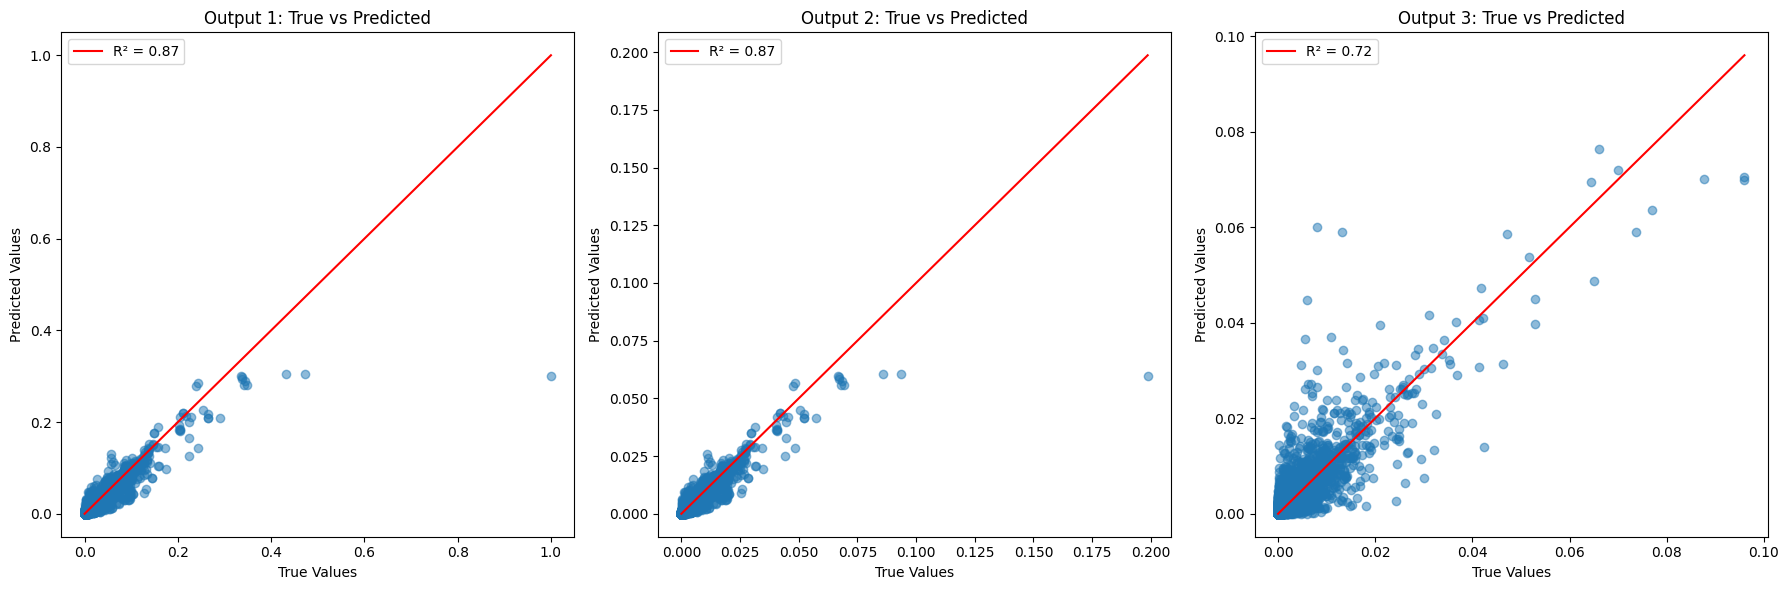

In [ ]:
best_params =  par
# Asignación de parámetros
n_d = best_params['n_d']
n_a = best_params['n_a']
n_steps = best_params['n_steps']
gamma = best_params['gamma']
lambda_sparse = 3.2e-05#best_params['lambda_sparse']
mask_type = best_params['mask_type']
batch_size = best_params['batch_size']
emb = best_params['emb']
p = best_params['p']
momentum = best_params['momentum']
learning_rate = best_params['learning_rate']
weight_decay = best_params['weight_decay']
scheduler_gamma = best_params['scheduler_gamma']
step_size = best_params['step_size']
virtual_batch_size = best_params['virtual_batch_size']
optimizer_type = best_params['optimizer_type']

# Configurar optimizador según el tipo seleccionado
if optimizer_type == 'adam':
    optimizer_fn = torch.optim.Adam
    optimizer_params = {'lr': learning_rate, 'weight_decay': weight_decay}
elif optimizer_type == 'adamw':
    optimizer_fn = torch.optim.AdamW
    optimizer_params = {'lr': learning_rate, 'weight_decay': weight_decay}
elif optimizer_type == 'sgd':
    optimizer_fn = torch.optim.SGD
    optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}
elif optimizer_type == 'rmsprop':
    optimizer_fn = torch.optim.RMSprop
    optimizer_params = {'lr': learning_rate, 'momentum': momentum, 'weight_decay': weight_decay}

# Definición de la técnica de aumento de datos
aug = RegressionSMOTE(p=p)

# Identificación de columnas categóricas y sus dimensiones
cat_idxs = [i for i, f in enumerate(features) if f in CATEGORICAL_COLUMNS]
cat_dims = [categorical_dims[f] for f in features if f in CATEGORICAL_COLUMNS]
cat_emb_dim = [min(emb, (dim + 1) // 2) for dim in cat_dims]
import torch
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Valores de lambda_sparse para iterar
lambda_values = [3.2e-05]

# Listas para guardar las máscaras y matrices de explicación de cada iteración
all_masks = []
all_explain_matrices = []

for iteration, lambda_sparse in enumerate(lambda_values):
    print(f"Iteración {iteration + 1}, lambda_sparse={lambda_sparse}")

    # Inicialización del modelo TabNetRegressor
    clf = CustomTabNetRegressor(
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,
        cat_idxs=cat_idxs,
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        mask_type=mask_type,
        optimizer_fn=optimizer_fn,
        optimizer_params=optimizer_params,
        scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        momentum=momentum,
        verbose=True
    )

    # Entrenar el modelo
    clf.fit(
        X_train=X_train,
        y_train=y_train[:,0:1],
        eval_set=[(X_train, y_train[:,0:1]), (X_valid, y_valid[:,0:1])],
        eval_name=['train', 'valid'],
        eval_metric=['mae'],
        loss_fn=my_r2_score_fn,
        max_epochs=200,
        patience=60,
        batch_size=batch_size,
        virtual_batch_size=virtual_batch_size,
        num_workers=0,
        drop_last=False,
        augmentations=aug,
    )

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
y_pred=clf.predict(X_test)
y_pred=np.tile(y_pred, (1, 3))
# Start figure for 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1
r2_1 = r2_score(y_test[:, 0], y_pred[:, 0])
axs[0].scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
axs[0].plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'r-', label=f'R² = {r2_1:.2f}')
axs[0].set_title('Output 1: True vs Predicted')
axs[0].set_xlabel('True Values')
axs[0].set_ylabel('Predicted Values')
axs[0].legend()

y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)
# Plot 2
r2_2 = r2_score(y_test[:, 0], y_pred[:, 0])
axs[1].scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
axs[1].plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'r-', label=f'R² = {r2_2:.2f}')
axs[1].set_title('Output 2: True vs Predicted')
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
axs[1].legend()

# Plot 3
r2_3 = r2_score(y_test[:, 1], y_pred[:, 0] * y_test[:, 2])
axs[2].scatter(y_test[:, 1], y_pred[:, 0] * y_test[:, 2], alpha=0.5)
axs[2].plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'r-', label=f'R² = {r2_3:.2f}')
axs[2].set_title('Output 3: True vs Predicted')
axs[2].set_xlabel('True Values')
axs[2].set_ylabel('Predicted Values')
axs[2].legend()

plt.tight_layout()
plt.show()



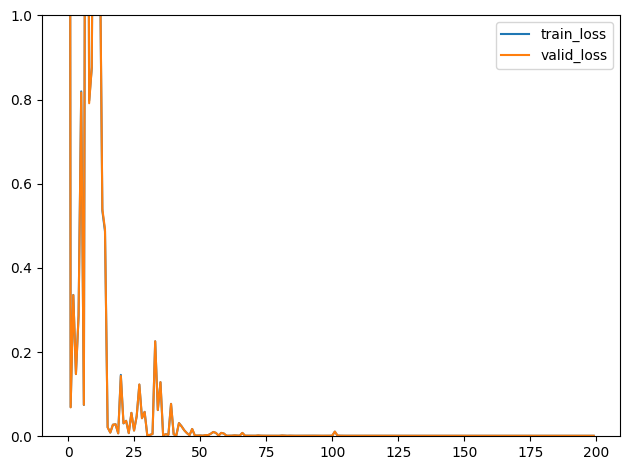

In [ ]:
import matplotlib.pyplot as plt
# plot losses
plt.plot(clf.history['train_mae'])
# plot accuracy
plt.plot(clf.history['valid_mae'])
plt.legend(['train_loss','valid_loss'])
plt.ylim(0,1)
plt.tight_layout()
plt.savefig('loss.pdf')
plt.show()
#plt.plot(clf.history['valid_mse'])

#Máscaras con LAT,LON

In [5]:
mask=np.load('/content/drive/Shareddrives/CURSO CHEC/Proyecto CHEC/Tabnet/mask.npy')

In [6]:
mask.shape

(168146, 294)

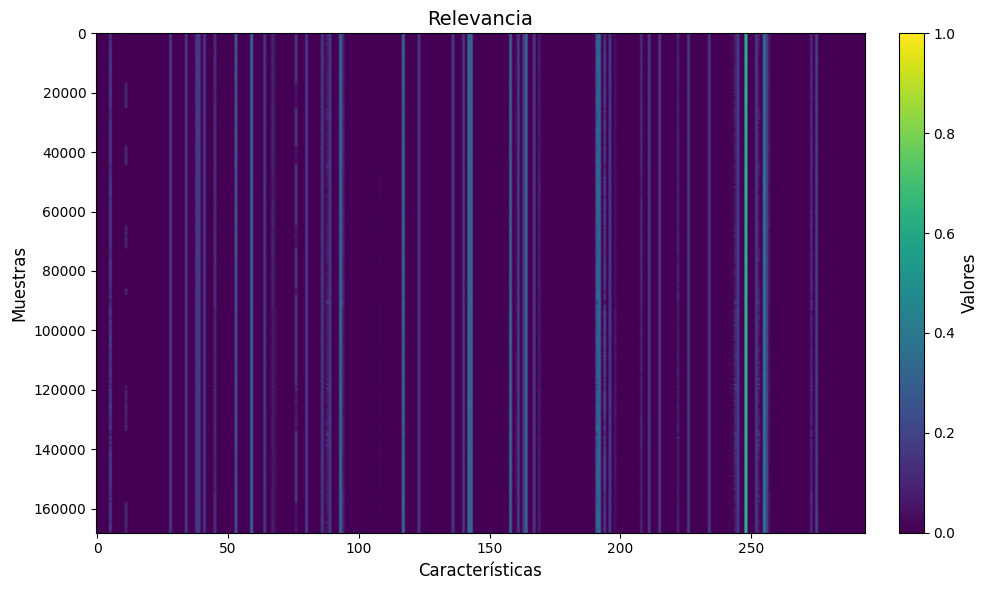

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Visualización de la máscara
min_val = np.min(mask)
max_val = np.max(mask)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de la máscara
im = ax.imshow(mask, aspect='auto', cmap='viridis', vmin=min_val, vmax=max_val)
ax.set_title("Relevancia", fontsize=14)
ax.set_xlabel("Características", fontsize=12)
ax.set_ylabel("Muestras", fontsize=12)

# Barra de color
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label("Valores", fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.savefig('Mask.pdf')
plt.show()


In [8]:
percentiles = np.percentile(y[:,0], [33.33, 66.66])  # Divisiones en tercios
y_categorized = np.digitize(y[:,0].flatten(), bins=percentiles).astype(int)

In [9]:
y_categorized.shape

(168146,)

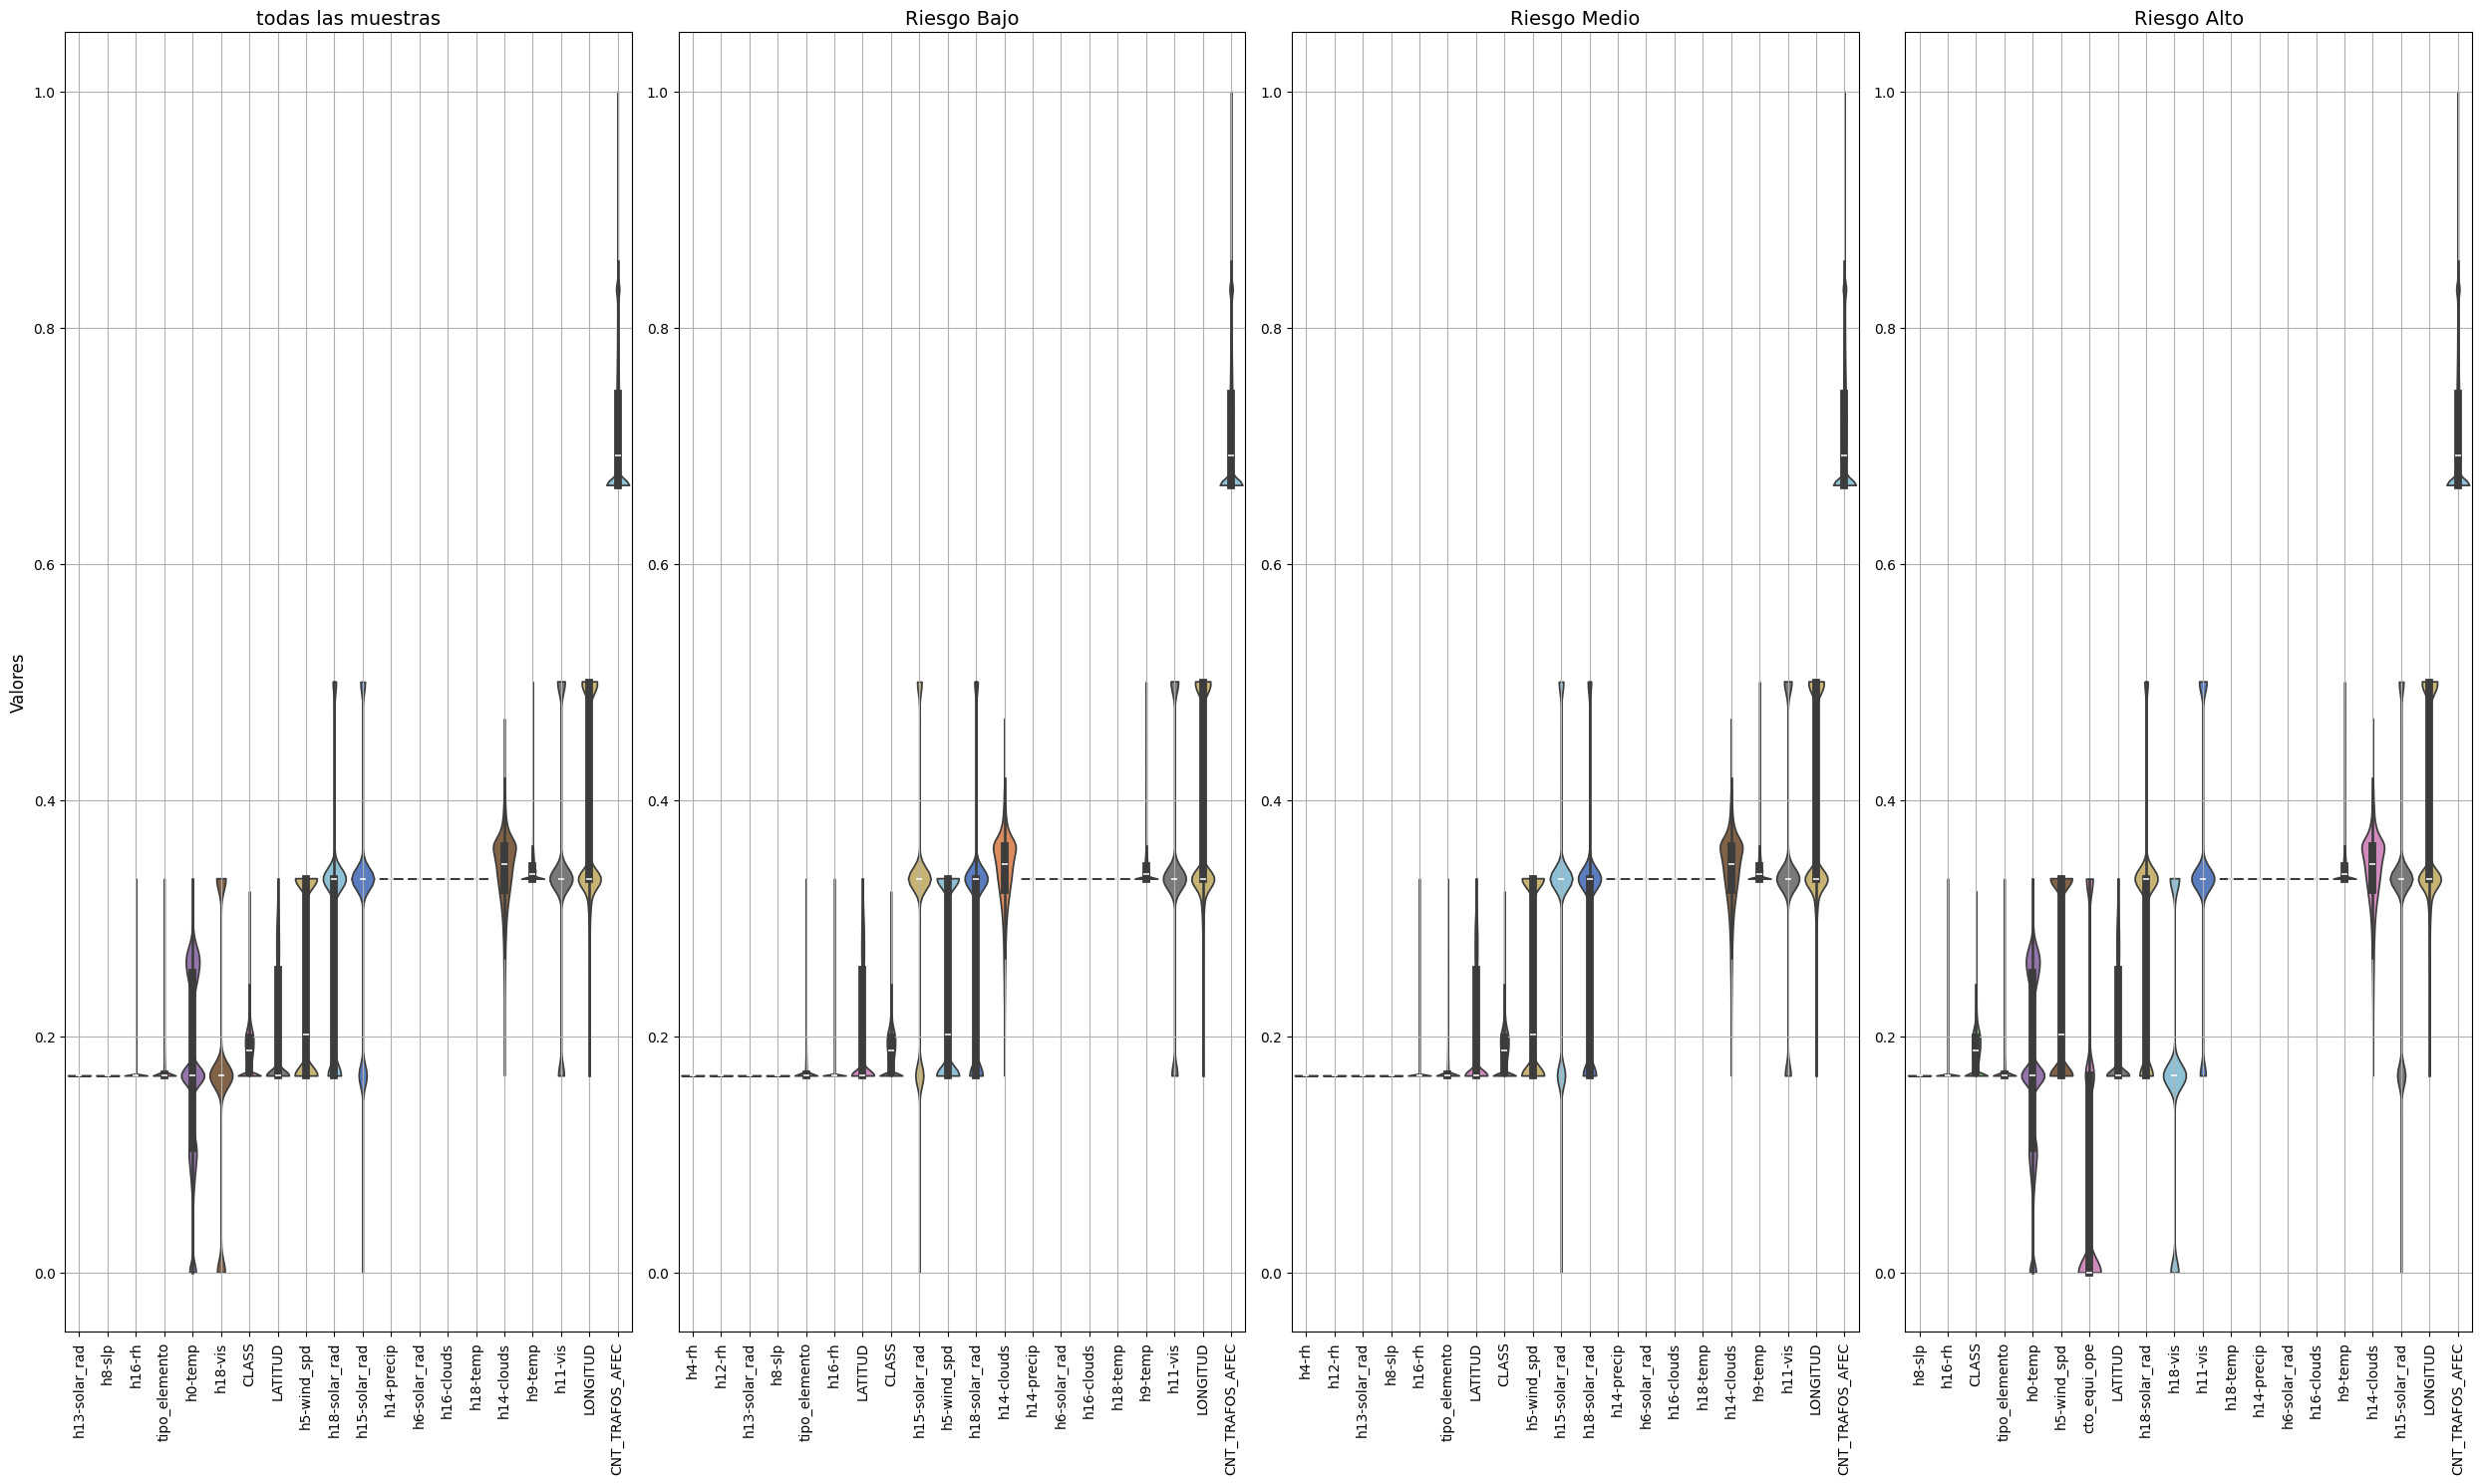

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

columns = df.columns

# Aplicar Softmax para normalizar la máscara
normalized_mask = softmax(mask, axis=1)

# Calcular la relevancia de las columnas (por ejemplo, media de los valores)
column_relevance = np.mean(normalized_mask, axis=0)

# Seleccionar las 20 columnas más relevantes
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_mask = mask[:, top_20_indices]

# Colores para las gráficas
colors = sns.color_palette("muted", len(top_20_columns))

# Crear figura con 4 gráficos
fig, axes = plt.subplots(1, 4, figsize=(25, 15))

# Gráfica 1: Violinplot para todas las muestras (20 columnas)
sns.violinplot(data=top_20_mask, inner="box", cut=0, palette=colors, ax=axes[0])
axes[0].set_xticks(range(len(top_20_columns)))
axes[0].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[0].set_ylabel("Valores", fontsize=12)
axes[0].set_title("todas las muestras", fontsize=14)

column_relevance = np.mean(mask[y_categorized == 0], axis=0)
# Seleccionar las 20 columnas más relevantes
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_mask = mask[:, top_20_indices]

# Gráfica 2: Violinplot para clase 0 (20 columnas)
sns.violinplot(data=top_20_mask, inner="box", cut=0, palette=colors, ax=axes[1])
axes[1].set_xticks(range(len(top_20_columns)))
axes[1].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[1].set_title("Riesgo Bajo", fontsize=14)


column_relevance = np.mean(mask[y_categorized == 1], axis=0)
# Seleccionar las 20 columnas más relevantes
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_mask = mask[:, top_20_indices]
# Gráfica 3: Violinplot para clase 1 (20 columnas)
sns.violinplot(data=top_20_mask, inner="box", cut=0, palette=colors, ax=axes[2])
axes[2].set_xticks(range(len(top_20_columns)))
axes[2].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[2].set_title("Riesgo Medio", fontsize=14)

column_relevance = np.mean(mask[y_categorized == 2], axis=0)
# Seleccionar las 20 columnas más relevantes
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_mask = mask[:, top_20_indices]
# Gráfica 4: Violinplot para clase 2 (20 columnas)
sns.violinplot(data=top_20_mask, inner="box", cut=0, palette=colors, ax=axes[3])
axes[3].set_xticks(range(len(top_20_columns)))
axes[3].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[3].set_title("Riesgo Alto", fontsize=14)
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)
axes[3].grid(True)
# Ajustar diseño
plt.tight_layout()
plt.savefig('violin.pdf')
plt.show()

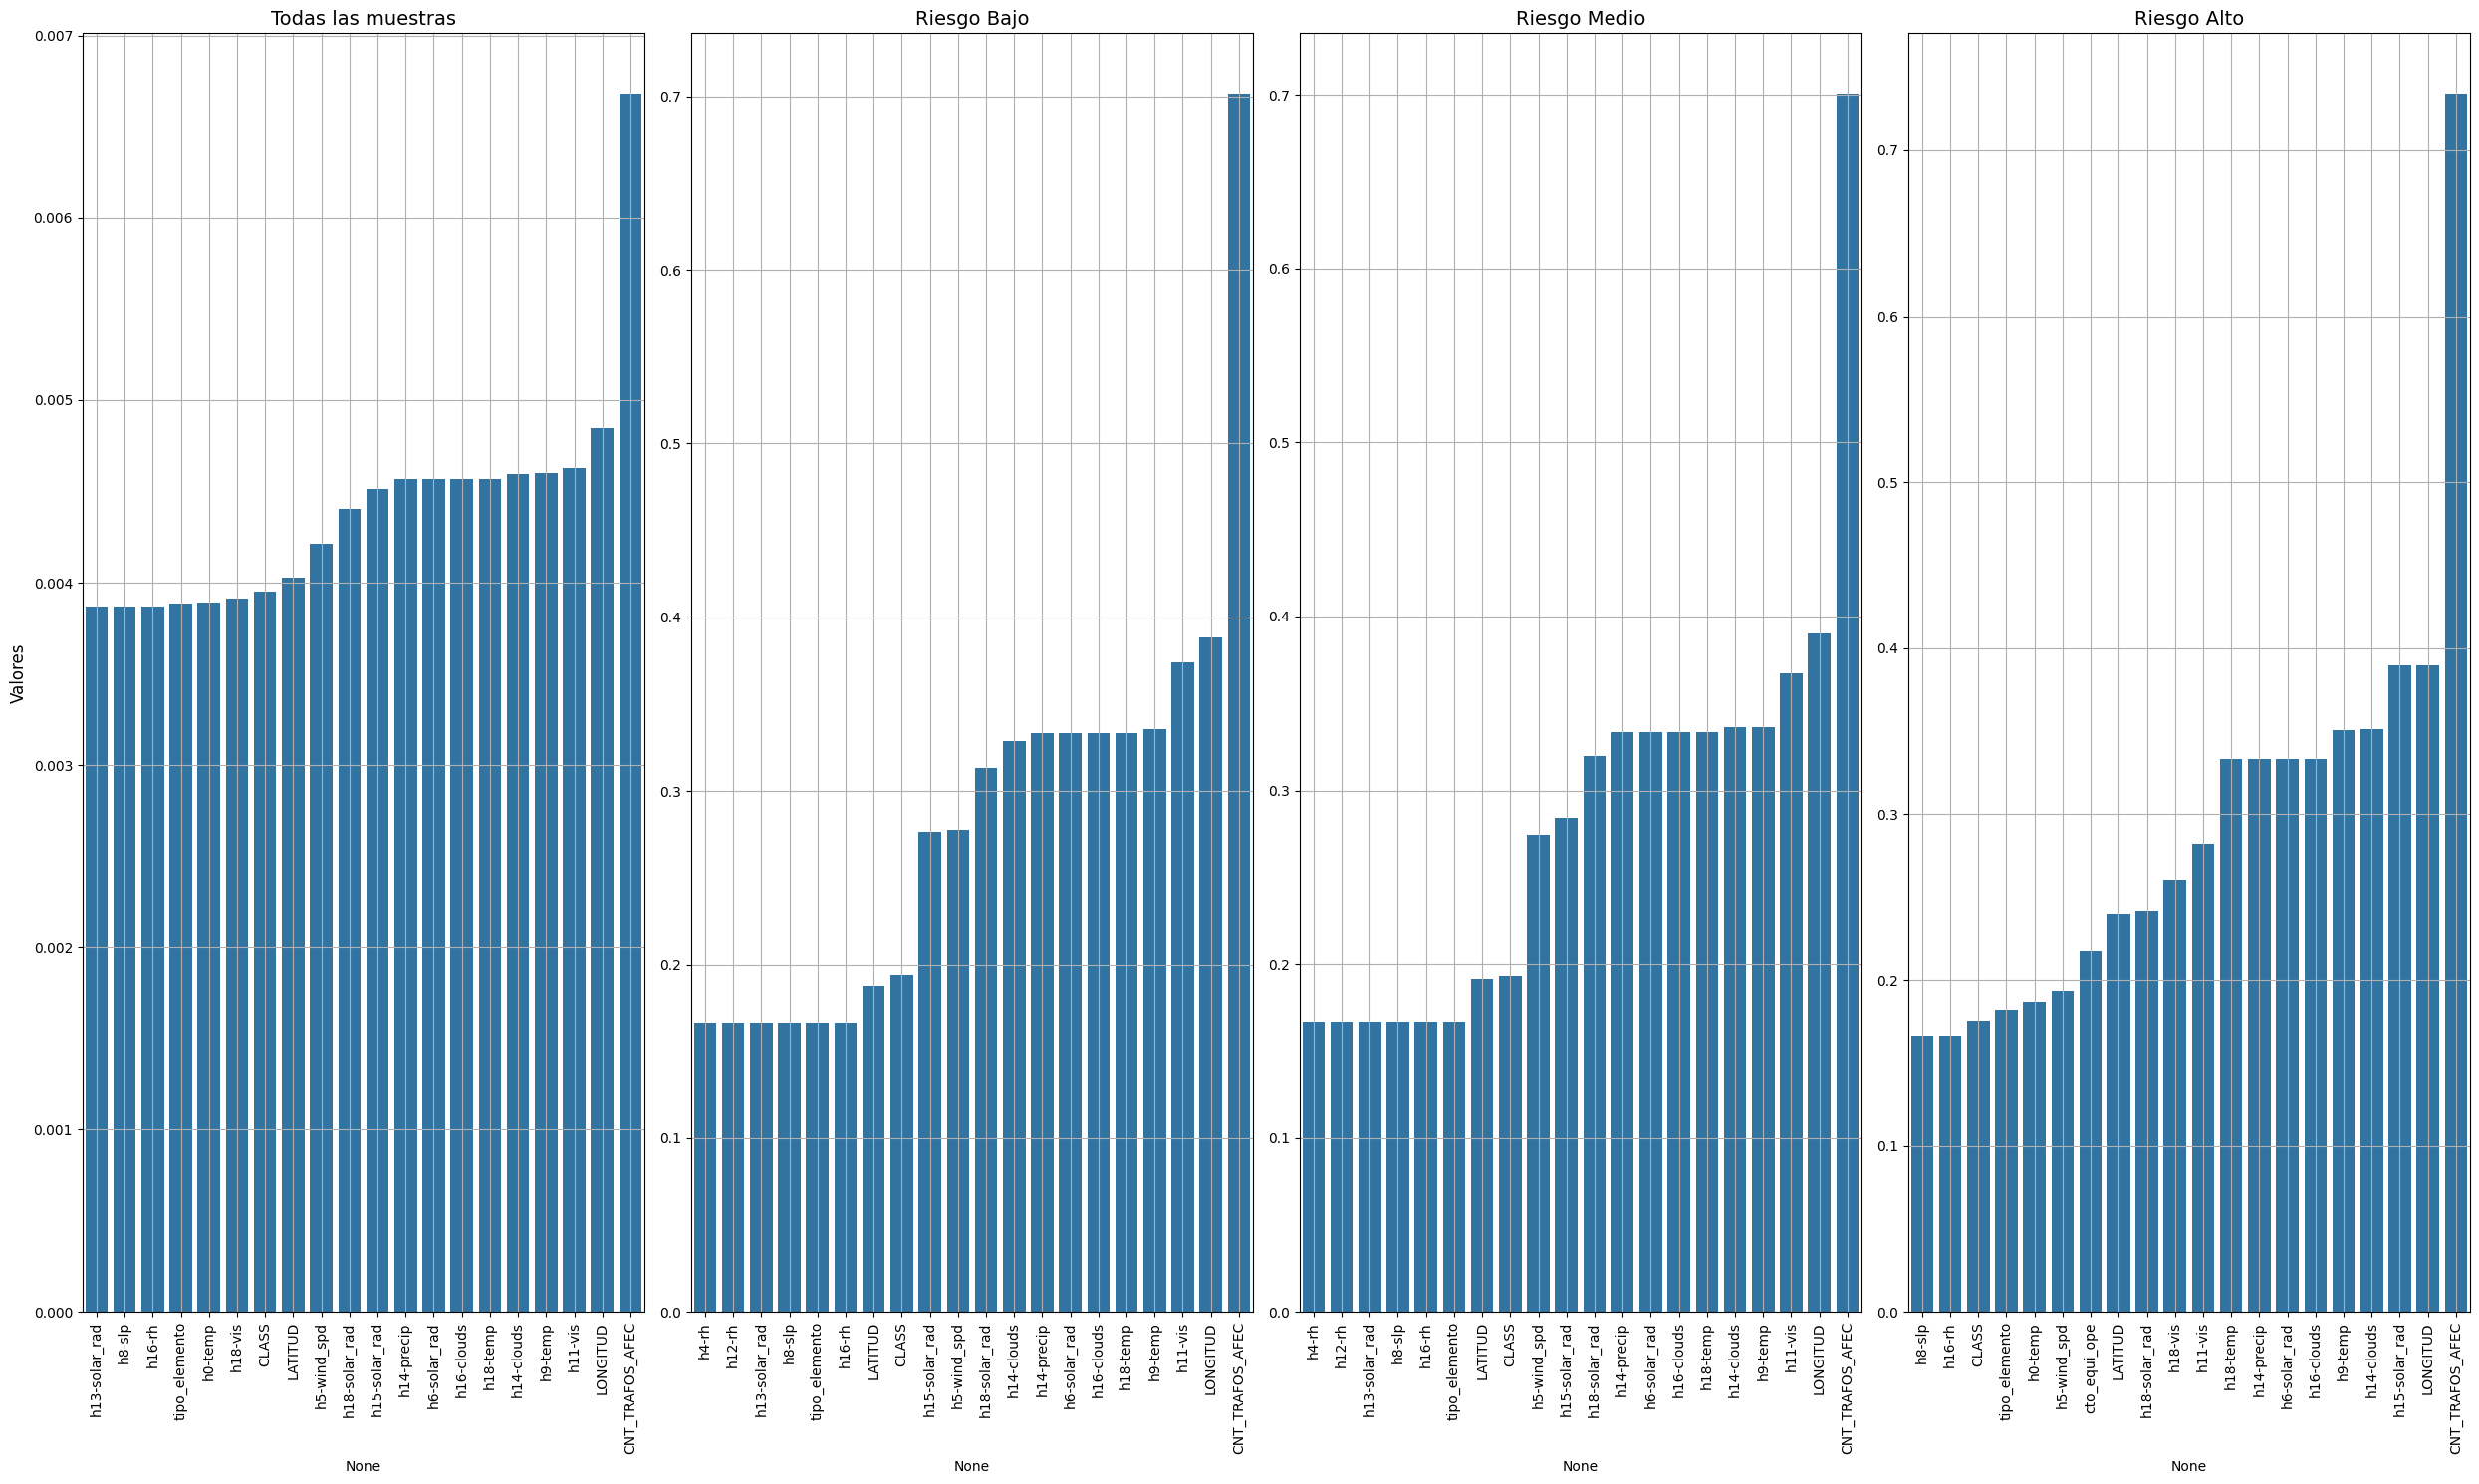

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax

columns = df.columns

# Aplicar Softmax para normalizar la máscara
normalized_mask = softmax(mask, axis=1)

# Calcular la relevancia de las columnas (por ejemplo, media de los valores)
column_relevance = np.mean(normalized_mask, axis=0)

# Seleccionar las 20 columnas más relevantes
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_relevance = column_relevance[top_20_indices]

# Colores para las gráficas
colors = sns.color_palette("muted", len(top_20_columns))

# Crear figura con 4 gráficos
fig, axes = plt.subplots(1, 4, figsize=(25, 15))

# Gráfica 1: Barplot para todas las muestras (20 columnas)
sns.barplot(x=top_20_columns, y=top_20_relevance, ax=axes[0])
axes[0].set_xticks(range(len(top_20_columns)))
axes[0].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[0].set_ylabel("Valores", fontsize=12)
axes[0].set_title("Todas las muestras", fontsize=14)

# Gráfica 2: Barplot para clase 0
column_relevance = np.mean(mask[y_categorized == 0], axis=0)
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_relevance = column_relevance[top_20_indices]
sns.barplot(x=top_20_columns, y=top_20_relevance, ax=axes[1])
axes[1].set_xticks(range(len(top_20_columns)))
axes[1].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[1].set_title("Riesgo Bajo", fontsize=14)

# Gráfica 3: Barplot para clase 1
column_relevance = np.mean(mask[y_categorized == 1], axis=0)
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_relevance = column_relevance[top_20_indices]
sns.barplot(x=top_20_columns, y=top_20_relevance, ax=axes[2])
axes[2].set_xticks(range(len(top_20_columns)))
axes[2].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[2].set_title("Riesgo Medio", fontsize=14)

# Gráfica 4: Barplot para clase 2
column_relevance = np.mean(mask[y_categorized == 2], axis=0)
top_20_indices = np.argsort(column_relevance)[-20:]  # Índices de las 20 más relevantes
top_20_columns = columns[top_20_indices]
top_20_relevance = column_relevance[top_20_indices]
sns.barplot(x=top_20_columns, y=top_20_relevance, ax=axes[3])
axes[3].set_xticks(range(len(top_20_columns)))
axes[3].set_xticklabels(top_20_columns, rotation=90, fontsize=10)
axes[3].set_title("Riesgo Alto", fontsize=14)
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)
axes[3].grid(True)
# Ajustar diseño
plt.tight_layout()
plt.savefig('barplot.pdf')
plt.show()


In [30]:
mask_df

,h0-clouds,h0-precip,h0-pres,h0-rh,h0-slp,h0-temp,h0-vis,h0-wind_gust_spd,h0-wind_spd,h1-clouds,...,NIVEL3CONDUCTOR,NIVEL4CONDUCTOR,ACOMETIDACONDUCTOR,NEUTRO,CALIBRENEUTRO,CAPACITY,RESISTANCE,LONGITUD2,LATITUD2,SAIFI
0,0.0,0.0,0.0,0.0,0.0,0.230222,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002
1,0.0,0.0,0.0,0.0,0.0,0.110605,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000653
2,0.0,0.0,0.0,0.0,0.0,0.113250,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006054
3,0.0,0.0,0.0,0.0,0.0,0.122911,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005016
4,0.0,0.0,0.0,0.0,0.0,0.230222,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168141,0.0,0.0,0.0,0.0,0.0,0.249622,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005
168142,0.0,0.0,0.0,0.0,0.0,0.266039,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000235
168143,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000038
168144,0.0,0.0,0.0,0.0,0.0,0.098654,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000082


In [37]:
mask_df = mask_df.loc[:, ~(mask_df == 0).all(axis=0)]

# Mostrar el DataFrame después de eliminar las columnas
print(mask_df)


        h0-clouds  h0-precip  h0-pres  h0-rh  h0-slp   h0-temp  h0-vis  \
0             0.0        0.0      0.0    0.0     0.0  0.230222     0.0   
1             0.0        0.0      0.0    0.0     0.0  0.110605     0.0   
2             0.0        0.0      0.0    0.0     0.0  0.113250     0.0   
3             0.0        0.0      0.0    0.0     0.0  0.122911     0.0   
4             0.0        0.0      0.0    0.0     0.0  0.230222     0.0   
...           ...        ...      ...    ...     ...       ...     ...   
168141        0.0        0.0      0.0    0.0     0.0  0.249622     0.0   
168142        0.0        0.0      0.0    0.0     0.0  0.266039     0.0   
168143        0.0        0.0      0.0    0.0     0.0  0.166667     0.0   
168144        0.0        0.0      0.0    0.0     0.0  0.098654     0.0   
168145        0.0        0.0      0.0    0.0     0.0  0.263295     0.0   

        h0-wind_gust_spd  h0-wind_spd  h1-clouds  ...  NIVEL3CONDUCTOR  \
0                    0.0          0.0

(array([1.61303e+05, 3.58700e+03, 1.74900e+03, 8.36000e+02, 3.46000e+02,
        1.98000e+02, 6.40000e+01, 4.30000e+01, 1.60000e+01, 4.00000e+00]),
 array([0.00000000e+00, 4.41632951e-05, 8.83265903e-05, 1.32489885e-04,
        1.76653181e-04, 2.20816476e-04, 2.64979771e-04, 3.09143066e-04,
        3.53306361e-04, 3.97469656e-04, 4.41632951e-04]),
 <BarContainer object of 10 artists>)

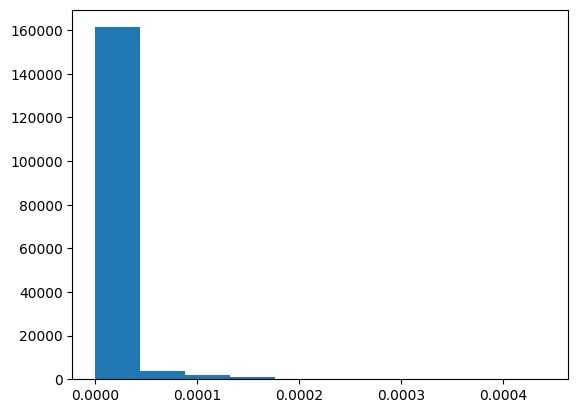

In [42]:
plt.hist(mask_df['h0-clouds'])

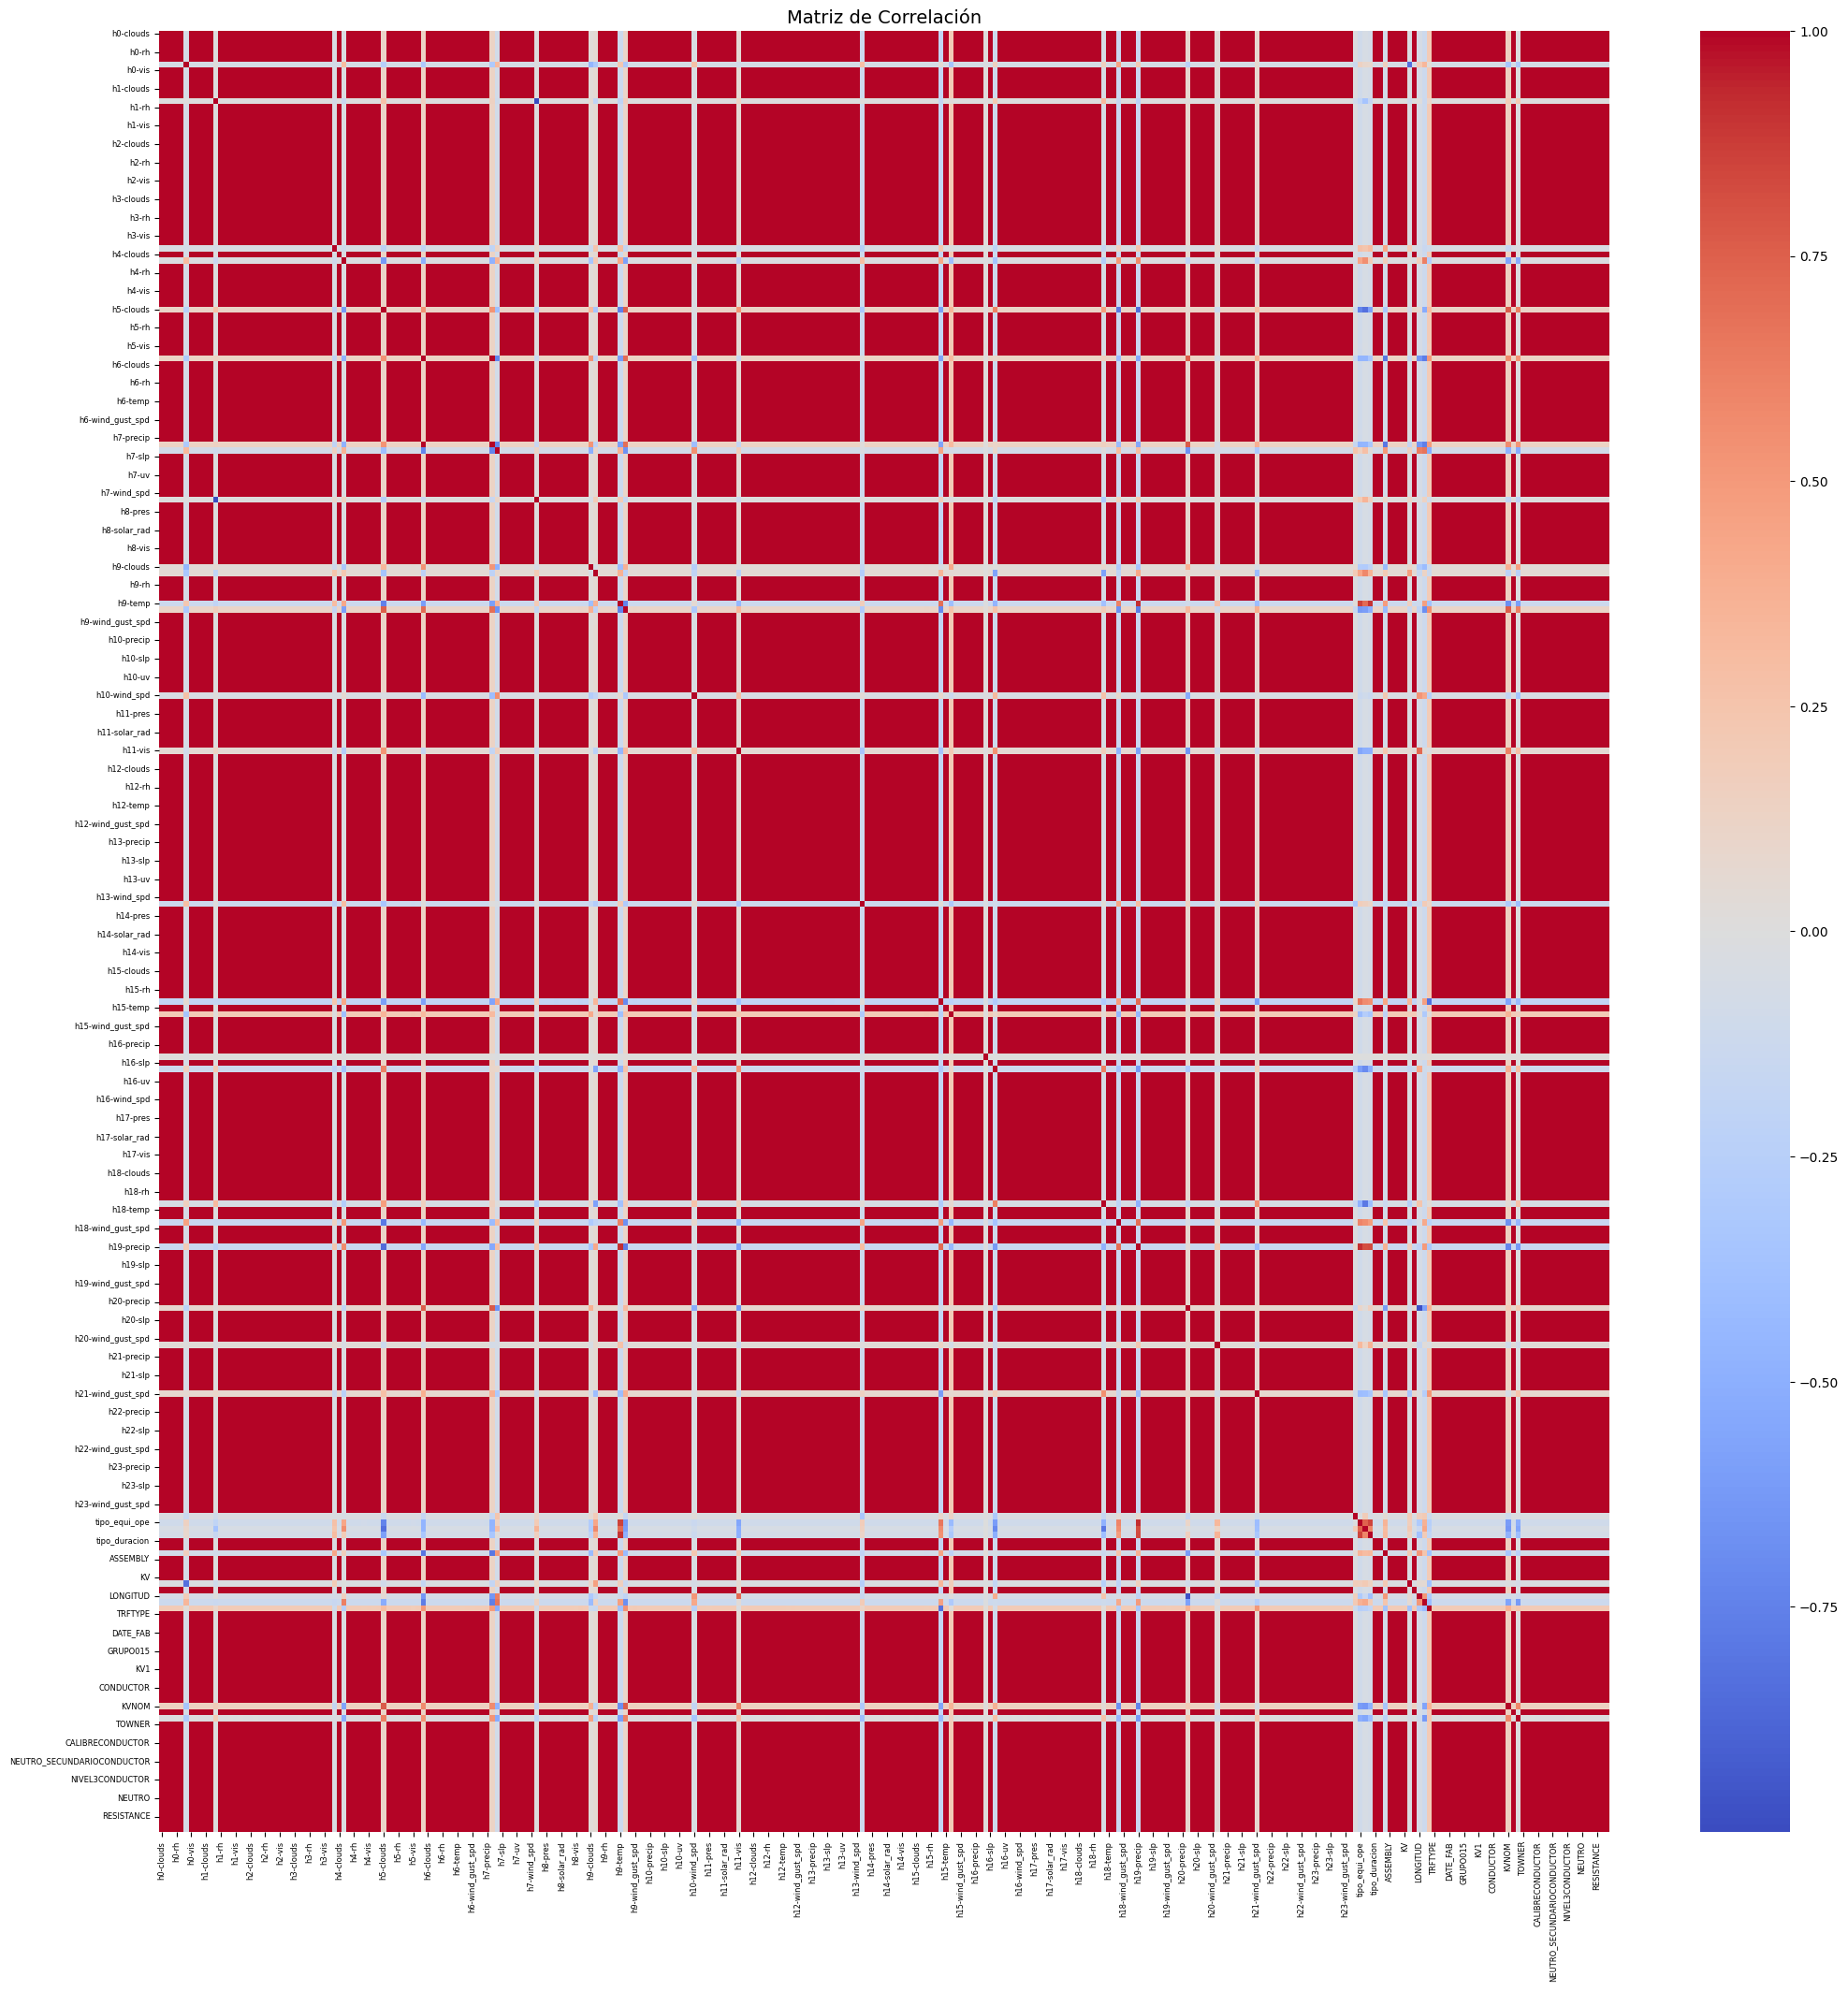

In [31]:
# Crear el DataFrame con las columnas de df
mask_df = pd.DataFrame(mask, columns=df.columns)
mask_df = mask_df.loc[:, (mask_df != 0).any(axis=0)]
# Calcular la matriz de correlación
correlation_matrix = mask_df.corr()
# Crear la figura más grande
plt.figure(figsize=(25, 25))  # Ajusta el tamaño de la figura (ancho, alto)

# Crear el mapa de calor con etiquetas más pequeñas
sns.heatmap(
    correlation_matrix,
    annot=False,  # Si no quieres las anotaciones, mantenlo en False
    cmap="coolwarm",
    cbar=True
)

# Ajustar el tamaño de las etiquetas
plt.xticks(rotation=90, fontsize=6)  # Cambia el tamaño y la rotación de las etiquetas del eje x
plt.yticks(fontsize=6)  # Cambia el tamaño de las etiquetas del eje y

# Mostrar el gráfico
plt.title("Matriz de Correlación", fontsize=14)  # Título del gráfico con tamaño ajustado
plt.show()


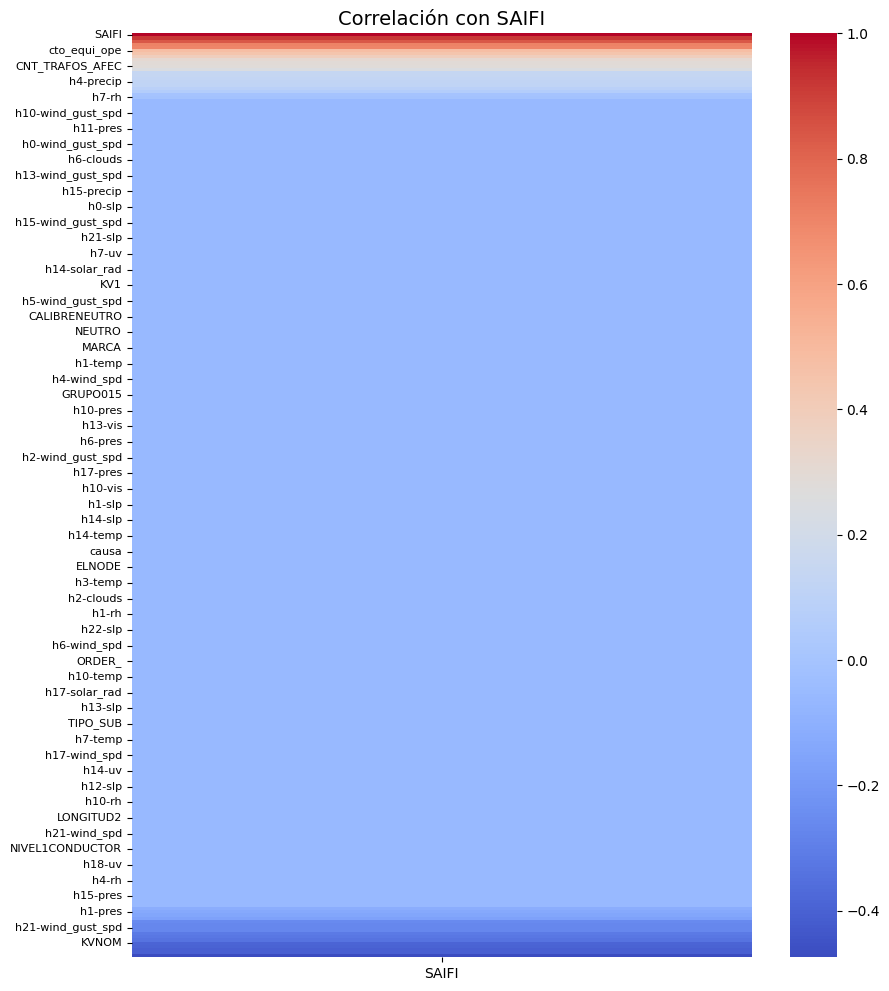

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
mask_df['SAIFI']=y[:,0]
correlation_matrix = mask_df.corr()

# Calcular la matriz de correlación y seleccionar solo la columna/fila 'SAIFI'
correlation_saifi = correlation_matrix[['SAIFI']].sort_values(by='SAIFI', ascending=False)

# Crear la figura más grande
plt.figure(figsize=(10, 12))  # Ajusta el tamaño de la figura (ancho, alto)

# Crear el mapa de calor con etiquetas más pequeñas
sns.heatmap(
    correlation_saifi,
    annot=False,  # Mostrar los valores numéricos
    cmap="coolwarm",
    cbar=True  # Mostrar la barra de colores
)

# Ajustar el tamaño de las etiquetas
plt.xticks(rotation=0, fontsize=10)  # Cambia el tamaño y la rotación de las etiquetas del eje x
plt.yticks(fontsize=8)  # Cambia el tamaño de las etiquetas del eje y

# Mostrar el gráfico
plt.title("Correlación con SAIFI", fontsize=14)  # Título del gráfico
plt.show()


In [33]:
correlation_saifi[(correlation_saifi['SAIFI']>0.1)|(correlation_saifi['SAIFI']<-0.1)]

,SAIFI
SAIFI,1.000000
tipo_elemento,0.914993
h9-temp,0.834733
h19-precip,0.708754
tipo_equi_ope,0.696458
cto_equi_ope,0.480549
h15-solar_rad,0.441542
h18-vis,0.388460
h20-wind_spd,0.309641
h9-precip,0.287657


In [ ]:
# mask_min = mask.min()
# mask_max = mask.max()
# mask_normalized = (mask - mask_min) / (mask_max - mask_min)
# mask_normalized[:10000]
# #y_categorized = y.copy()
# from openTSNE import TSNEEmbedding
# from openTSNE import affinity
# from openTSNE import initialization
# import numpy as np
# from sklearn.model_selection import train_test_split
# # percentiles = np.percentile(y[:10000], [33.33, 66.66])  # Divisiones en tercios
# # y_categorized = np.digitize(y[:10000], bins=percentiles).astype(int)
# import matplotlib.pyplot as plt
# affinities_train = affinity.PerplexityBasedNN(
#     mask_normalized,
#     perplexity=10,
#     metric="cosine",
#     n_jobs=-1,
#     random_state=42,
#     verbose=True,
# )
# init_train = initialization.pca(mask_normalized, random_state=42)
# embedding_train = TSNEEmbedding(
#     init_train,
#     affinities_train,
#     negative_gradient_method="fft",
#     n_jobs=-1,
#     verbose=True,
# )
# embedding_train_1 = embedding_train.optimize(n_iter=500,exaggeration=700)


===> Finding 30 nearest neighbors using Annoy approximate search using cosine distance...
   --> Time elapsed: 162.27 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 5.81 seconds
===> Running optimization with exaggeration=700.00, lr=240.32 for 500 iterations...
Iteration   50, KL divergence 9.4521, 50 iterations in 11.5925 sec
Iteration  100, KL divergence 9.4521, 50 iterations in 9.7482 sec
Iteration  150, KL divergence 9.4521, 50 iterations in 10.9548 sec
Iteration  200, KL divergence 9.4521, 50 iterations in 11.7497 sec
Iteration  250, KL divergence 9.4519, 50 iterations in 12.4787 sec
Iteration  300, KL divergence 9.4510, 50 iterations in 9.8707 sec
Iteration  350, KL divergence 9.4462, 50 iterations in 11.4888 sec
Iteration  400, KL divergence 9.4229, 50 iterations in 12.3054 sec
Iteration  450, KL divergence 9.3363, 50 iterations in 11.6017 sec
Iteration  500, KL divergence 9.1963, 50 iterations in 9.2971 sec
   --> Time elapsed: 111.09 seconds


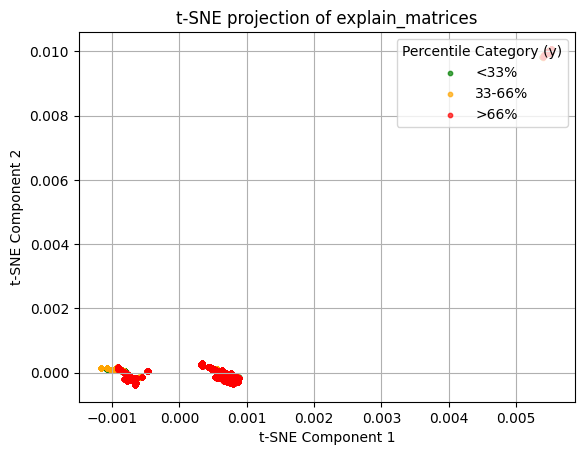

In [ ]:
# colors = ['green', 'orange', 'red']
# labels = ['<33%', '33-66%', '>66%']
# for i, label in enumerate(labels):
#     indices = np.where(y_categorized == i)[0]  # Filtrar índices para la categoría
#     plt.scatter(
#         embedding_train_1[indices, 0],  # Filtrar por categoría
#         embedding_train_1[indices, 1],
#         c=colors[i],
#         label=label,
#         s=10,
#         alpha=0.7
#     )
# plt.title("t-SNE projection of explain_matrices")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")
# plt.grid(True)
# plt.legend(title="Percentile Category (y)", loc='upper right')